### Importing Necessary Libraries 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

### Reading the data

In [2]:
titanic = pd.read_csv('Titanic-Dataset.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dropping the Un-Necessary Columns

In [4]:
unessential_columns = ["PassengerId","Name","Ticket",]

data = titanic.drop(columns = unessential_columns)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
data.shape

(891, 9)

#### Data Cleaning 

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### check wheter Cabin has any sort of linear influence on target column Survived 

In [8]:
cross_tab = pd.crosstab(data['Cabin'], data['Survived'])

cross_tab

Survived,0,1
Cabin,,
A10,1,0
A14,1,0
A16,0,1
A19,1,0
A20,0,1
...,...,...
F33,0,3
F38,1,0
F4,0,2


<Axes: xlabel='Survived', ylabel='Cabin'>

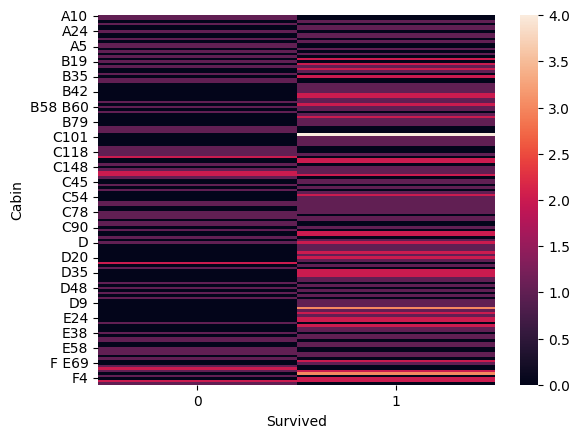

In [9]:
sns.heatmap(cross_tab)

In [10]:
## the cabin doesnt have any kind of linear impact on the target cloumn survived 

remove = ['Cabin']
data = data.drop(columns = remove)


In [11]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
data = data.dropna(subset=['Embarked'])

In [13]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [14]:
data.shape

(889, 8)

In [15]:
(data['Age'].isnull().sum().sum()/len(data['Age']))*100


19.910011248593925

In [16]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Performing Data Visualization

<Axes: xlabel='Age', ylabel='Fare'>

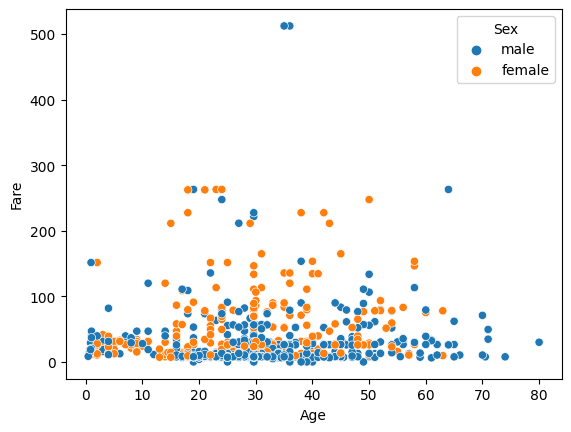

In [19]:
sns.scatterplot(x=data['Age'],y=data['Fare'],hue=data['Sex'])

<Axes: xlabel='Sex', ylabel='Survived'>

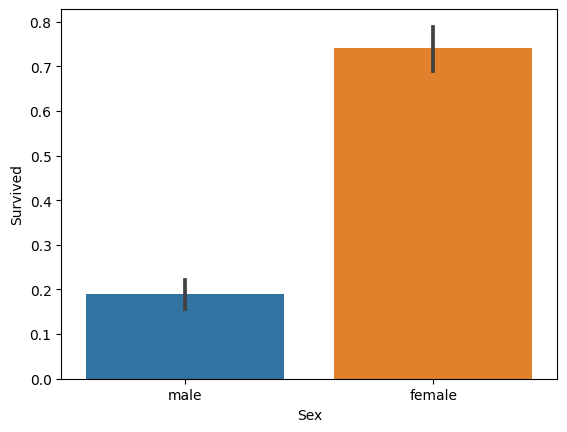

In [20]:
sns.barplot(x=data['Sex'],y=data['Survived'])

<Axes: xlabel='Sex', ylabel='Age'>

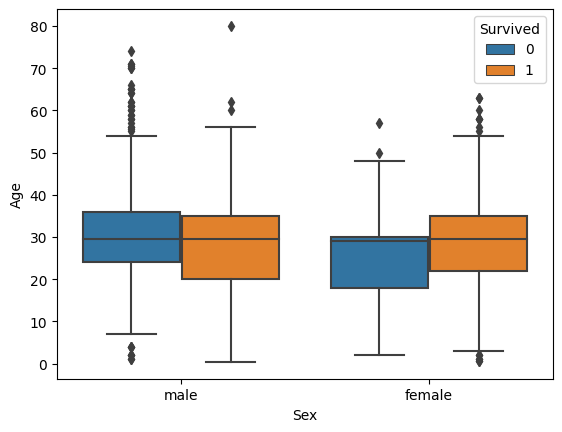

In [21]:
sns.boxplot(x=data['Sex'],y=data['Age'],hue = data['Survived'])

C:\Users\ganes\AppData\Local\Temp\ipykernel_16356\990261953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==0]['Age'],hist = False)
C:\Users\ganes\AppData\Local\Temp\ipykernel_16356\990261953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[da

<Axes: xlabel='Age', ylabel='Density'>

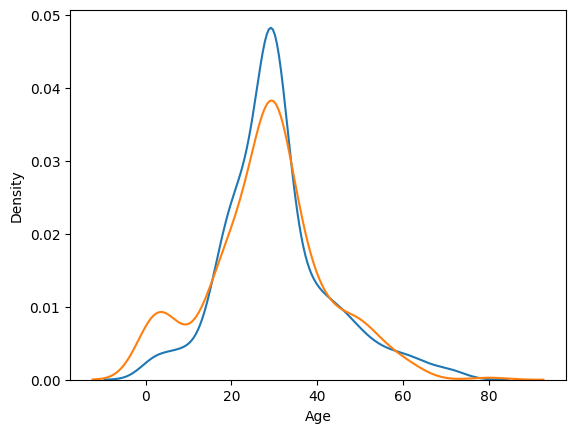

In [22]:
sns.distplot(data[data['Survived']==0]['Age'],hist = False)
sns.distplot(data[data['Survived']==1]['Age'],hist = False)

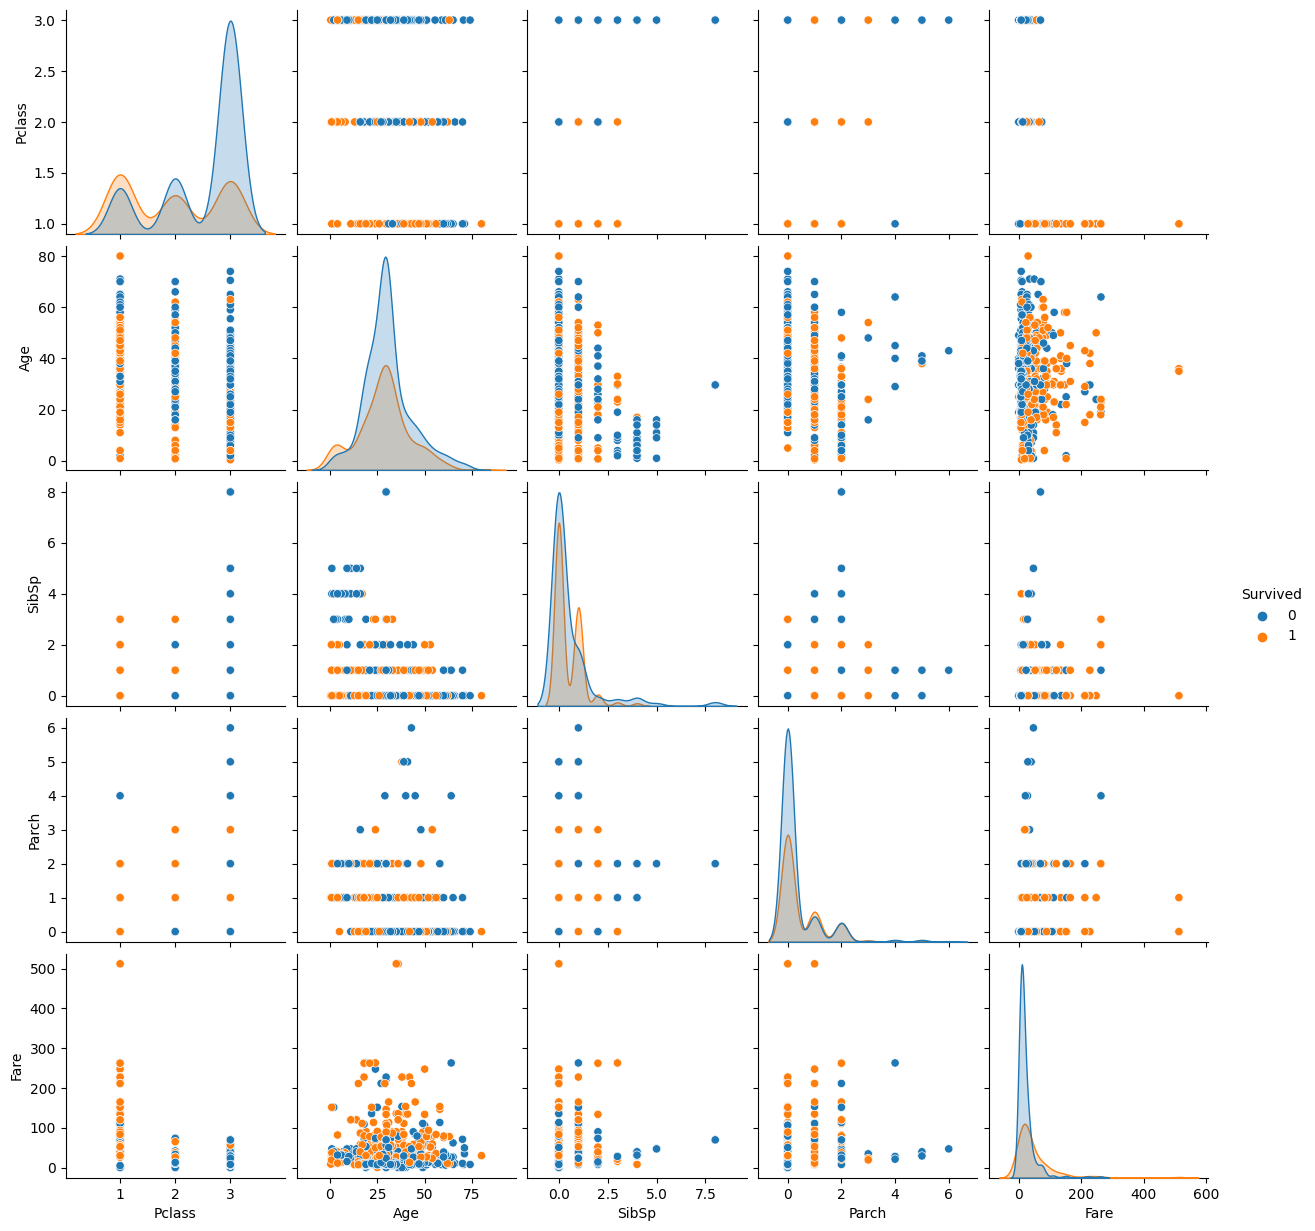

In [23]:
sns.pairplot(data,hue='Survived')

In [24]:
X = data.iloc[:,1:]

In [25]:
y = data.Survived

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_dummies = pd.get_dummies(X, columns=['Sex'])

In [28]:
X_dummies_drop = ['Embarked']
X_dummies = X_dummies.drop(columns =X_dummies_drop )


In [29]:
drop_column =['Embarked']
X = X.drop(columns = drop_column)


In [30]:
X = pd.get_dummies(X,columns=['Sex'])

In [31]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.000000,1,0,7.2500,0,1
1,1,38.000000,1,0,71.2833,1,0
2,3,26.000000,0,0,7.9250,1,0
3,1,35.000000,1,0,53.1000,1,0
4,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1
887,1,19.000000,0,0,30.0000,1,0
888,3,29.642093,1,2,23.4500,1,0
889,1,26.000000,0,0,30.0000,0,1


### SPlitting the data into training and testing 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=24)

### Applying  Standard Scaler 

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()


In [38]:
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
predict = model.predict(X_test)

In [40]:
predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

### Checking MOdels Accuracy 

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
results = accuracy_score(y_test,predict)

In [43]:
results  

0.8197278911564626